In [17]:
import pandas as pd
import numpy as np
from sklearn import datasets
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
import warnings
warnings.filterwarnings('ignore')

In [18]:
titanic= pd.read_csv('titanic_new.csv', index_col=0)
titanic.head()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,sex_new
0,1,0,3,22.0,1,0,A/5 21171,7.2500,NaN,S,1
1,2,1,1,38.0,1,0,PC 17599,71.2833,C85,C,0
2,3,1,3,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,0
3,4,1,1,35.0,1,0,113803,53.1000,C123,S,0
4,5,0,3,35.0,0,0,373450,8.0500,NaN,S,1


In [19]:
X=titanic[['Pclass',  'sex_new', 'Age', 'SibSp', 'Parch',  'Fare']]
y=titanic['Survived']

In [20]:
X_eğitim, X_test, y_eğitim, y_test =  train_test_split(X, y, test_size=0.20, random_state=111)
survived_modeli = LogisticRegression()
survived_modeli.fit(X_eğitim, y_eğitim)

tahmin_eğitim =survived_modeli.predict(X_eğitim)
tahmin_test = survived_modeli.predict(X_test)

In [21]:
tahmin_test_ihtimal = survived_modeli.predict_proba(X_test)[:,1]

In [22]:
from sklearn.metrics import confusion_matrix
hata_matrisi_eğitim = confusion_matrix(y_eğitim, tahmin_eğitim)
hata_matrisi_test = confusion_matrix(y_test, tahmin_test)
print("Hata Matrisi (Eğitim verileri)", "-"*30, hata_matrisi_eğitim, sep="\n")
print("Hata Matrisi (Test verileri)", "-"*30, hata_matrisi_test, sep="\n")

Hata Matrisi (Eğitim verileri)
------------------------------
[[378  58]
 [ 83 193]]
Hata Matrisi (Test verileri)
------------------------------
[[97 16]
 [22 44]]


In [23]:
TN = hata_matrisi_test[0][0]
TP = hata_matrisi_test[1][1]
FP = hata_matrisi_test[0][1]
FN = hata_matrisi_test[1][0]

print("Doğru negatif sayısı   :", TN)
print("Doğru pozitif sayısı   :", TP)
print("Yanlış pozitif sayısı  :", FP)
print("Yanlış negatif sayısı  :", FN)

Doğru negatif sayısı   : 97
Doğru pozitif sayısı   : 44
Yanlış pozitif sayısı  : 16
Yanlış negatif sayısı  : 22


In [24]:
from sklearn.metrics import accuracy_score

print("Modelden alınan doğruluk değeri : ",  survived_modeli.score(X_test, y_test))
print("Hesaplanan doğruluk değeri      : ",  (TN + TP)/(FN + FP + TN + TP))
print("accuracy_score() değeri         : ",  accuracy_score(y_test, tahmin_test))

Modelden alınan doğruluk değeri :  0.7877094972067039
Hesaplanan doğruluk değeri      :  0.7877094972067039
accuracy_score() değeri         :  0.7877094972067039


In [25]:
from sklearn.metrics import precision_score

print("Hesaplanan doğruluk değeri      : ",  (TP)/(FP + TP))
print("precision_score() değeri        : ",  precision_score(y_test, tahmin_test))

Hesaplanan doğruluk değeri      :  0.7333333333333333
precision_score() değeri        :  0.7333333333333333


In [26]:
from sklearn.metrics import recall_score

print("Hesaplanan doğruluk değeri   : ",  (TP)/(TP + FN))
print("recall_score() değeri        : ",  recall_score(y_test, tahmin_test))

Hesaplanan doğruluk değeri   :  0.6666666666666666
recall_score() değeri        :  0.6666666666666666


In [27]:
print("Hesaplanan özgünlük değeri   : ",  (TN)/(TN + FP))

Hesaplanan özgünlük değeri   :  0.8584070796460177


In [28]:
from sklearn.metrics import f1_score

hassasiyet_degeri = precision_score(y_test, tahmin_test)
duyarlılık_değeri = recall_score(y_test, tahmin_test)


print("Hesaplanan f1 skoru   : ",  2*((hassasiyet_degeri*duyarlılık_değeri)/(hassasiyet_degeri + duyarlılık_değeri)))
print("f1_score() değeri     : ",  f1_score(y_test, tahmin_test))

Hesaplanan f1 skoru   :  0.6984126984126984
f1_score() değeri     :  0.6984126984126984


In [29]:
from sklearn.metrics import classification_report, precision_recall_fscore_support

print(classification_report(y_test,tahmin_test) )

print("f1_score() değeri        : {:.2f}".format(f1_score(y_test, tahmin_test)))
print("recall_score() değeri    : {:.2f}".format(recall_score(y_test, tahmin_test)))
print("precision_score() değeri : {:.2f}".format(precision_score(y_test, tahmin_test)))
print('\n')

metrikler =  precision_recall_fscore_support(y_test, tahmin_test)
print("Hassasiyet :" , metrikler[0]) 
print("Duyarlılık :" , metrikler[1]) 
print("F1 Skoru   :" , metrikler[2]) 

              precision    recall  f1-score   support

           0       0.82      0.86      0.84       113
           1       0.73      0.67      0.70        66

    accuracy                           0.79       179
   macro avg       0.77      0.76      0.77       179
weighted avg       0.78      0.79      0.79       179

f1_score() değeri        : 0.70
recall_score() değeri    : 0.67
precision_score() değeri : 0.73


Hassasiyet : [0.81512605 0.73333333]
Duyarlılık : [0.85840708 0.66666667]
F1 Skoru   : [0.8362069 0.6984127]


In [36]:
tahmin_test_ihtimal = survived_modeli.predict_proba(X_test)[:,1]

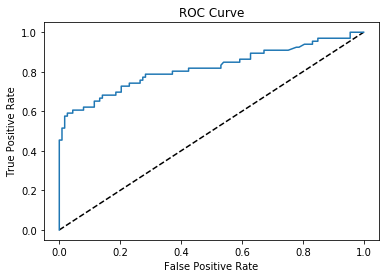

In [40]:
from sklearn.metrics import roc_curve, roc_auc_score

fpr, tpr, thresholds  = roc_curve(y_test, tahmin_test_ihtimal)

import matplotlib.pyplot as plt
# Plot ROC curve
plt.plot([0, 1], [0, 1], 'k--')
plt.plot(fpr, tpr)
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.show()

In [38]:
print('AUC Değeri : ', roc_auc_score(y_test, tahmin_test_ihtimal))


AUC Değeri :  0.8189863234111022


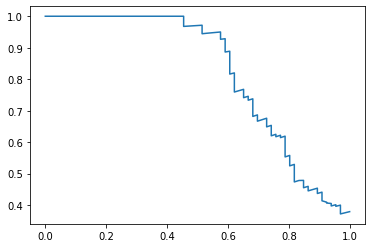

In [39]:
from sklearn.metrics import precision_recall_curve
hassasiyet, duyarlılık, _ = precision_recall_curve(y_test, tahmin_test_ihtimal)

plt.plot(duyarlılık, hassasiyet)
plt.show()